# Passengers flight satisfaction

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [8]:
df = pd.read_csv(r'C:\Users\USER\OneDrive\שולחן העבודה\Final project - Copy\Passengers_satisfaction.csv')
df.head(5)

,Column1,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


Removing the first and second column, "Column1", "id".

In [9]:
df.drop("Column1",axis=1,inplace=True)
df.drop("id",axis=1,inplace=True)

The number of rows and columns

In [10]:
df.shape

(25976, 23)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

In [12]:
df.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0
dtype: int64

As we can see there are only **83** null values, in "Arrival Delay in Minutes".<br>

**Description about each column :**
<br>
- Gender - Gender of the passenger: Female/Male
- Customer Type - The customer type: Loyal customer/Disloyal customer
- Age - The actual age of the passenger
- Type of Travel - The purpose of the flight of the passenger: Personal Travel/Business Travel
- Class - Travel class in the plane of the passenger: Business/Eco/Eco Plus
- Flight Distance - The flight distance of the journey
- Inflight wifi service - Satisfaction level of the inflight wifi service: 0-5 (0-worst,5-best)
- Departure/Arrival time convenient - Satisfaction level of Departure/Arrival time convenient: 0-5 (0-worst,5-best)
- Ease of Online booking - Satisfaction level of online booking: 0-5 (0-worst,5-best)
- Gate location - Satisfaction level of Gate location: 0-5 (0-worst,5-best)
- Food and drink - Satisfaction level of Food and drink: 0-5 (0-worst,5-best)
- Online boarding - Satisfaction level of online boarding: 0-5 (0-worst,5-best)                      
- Seat comfort - Satisfaction level of Seat comfort: 0-5 (0-worst,5-best)                          
- Inflight entertainment - Satisfaction level of inflight entertainment: 0-5 (0-worst,5-best)
- On-board service - Satisfaction level of On-board service: 0-5 (0-worst,5-best)                      
- Leg room service - Satisfaction level of Leg room service: 0-5 (0-worst,5-best)                     
- Baggage handling - Satisfaction level of baggage handling: 0-5 (0-worst,5-best)                      
- Checkin service - Satisfaction level of Check-in service: 0-5 (0-worst,5-best)                      
- Inflight service - Satisfaction level of inflight service: 0-5 (0-worst,5-best)                     
- Cleanliness - Satisfaction level of Cleanliness: 0-5 (0-worst,5-best)                          
- Departure Delay in Minutes - Minutes delayed when departure          
- Arrival Delay in Minutes -  Minutes delayed when Arrival
- satisfaction - Airline satisfaction level: Satisfaction/Neutral/Dissatisfaction       

<br>
Replacing satisfied to 1 <br>
Replacing neutral or dissatisfied to 0

In [13]:
df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [14]:
df['satisfaction'].head(3)

0    1
1    1
2    0
Name: satisfaction, dtype: int64

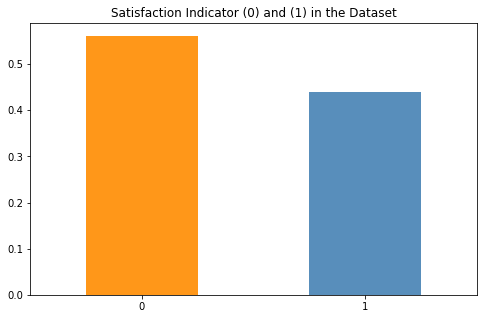

In [15]:
fig = plt.figure(figsize = (8,5))
df['satisfaction'].value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

The plot above shows a distribution of around 55%:45% between neutral/dissatisfied passengers and satisfied passengers.

We saw before that the column "Arrival Delay in Minutes" has 83 null values, so we will fill them with the average.

In [16]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

In [17]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

**Nice!** <br> Now we don't have any null values.

The columns with
**categorical variables:** 

In [18]:
df.select_dtypes(include=['object']).columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

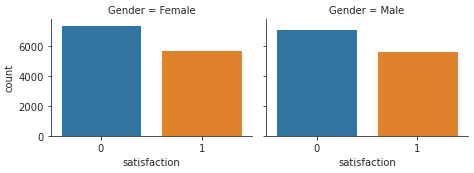

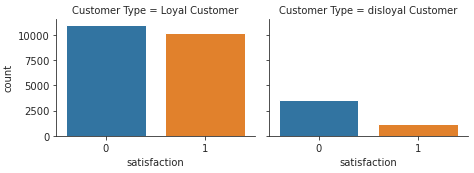

In [19]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=df, kind="count", height=2.5, aspect=1.3)  
    g = sns.catplot("satisfaction", col="Customer Type", col_wrap=2, data=df, kind="count", height=2.5, aspect=1.3)

#### As we can tell from the plot above : <br>
The number of both males and females dissatisfied is bigger than the number of satisfied customers. <br>
The same thing happened with loyal customers and disloyal customers.

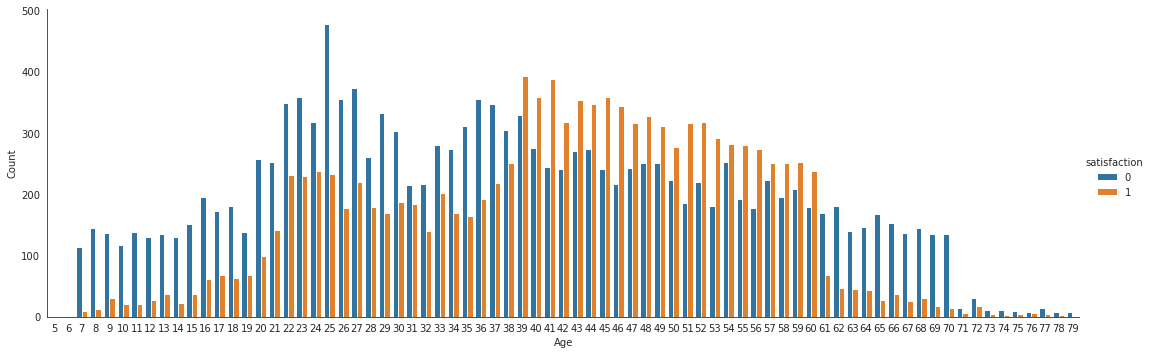

In [20]:
with sns.axes_style('white'):
    g = sns.catplot("Age", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Count')

#### As we can tell from the plot above : <br>
From age 7 to 38, and from age 61 to 79, quotient of dissatisfied passengers is very high compared to satisfied passengers.<br>
But, from age 39 to 60, quotient of satisfied passengers is higher compared to dissatisfied passengers.

In [21]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

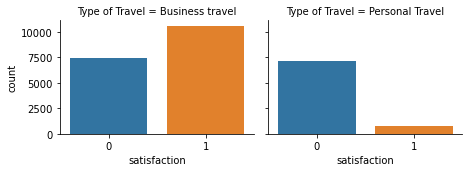

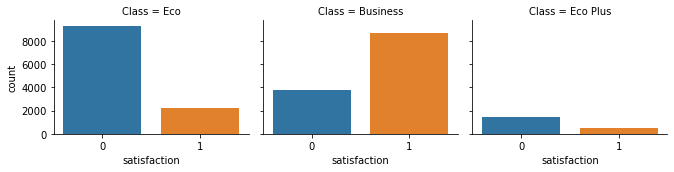

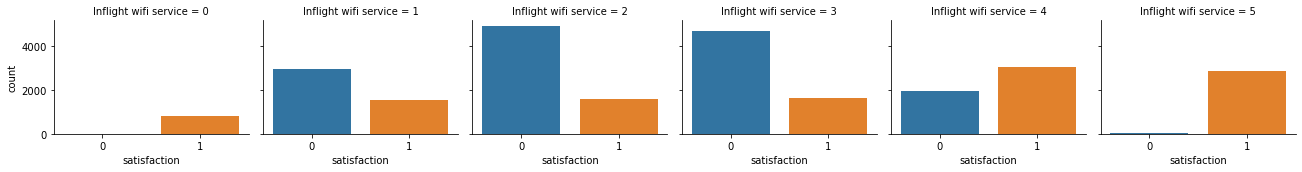

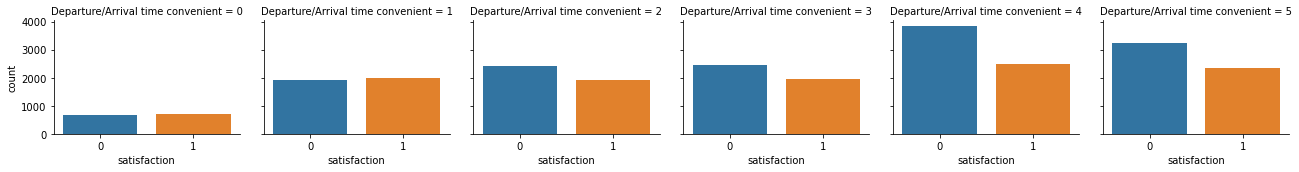

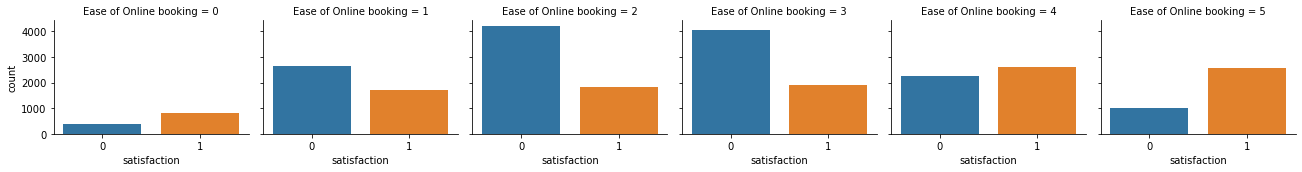

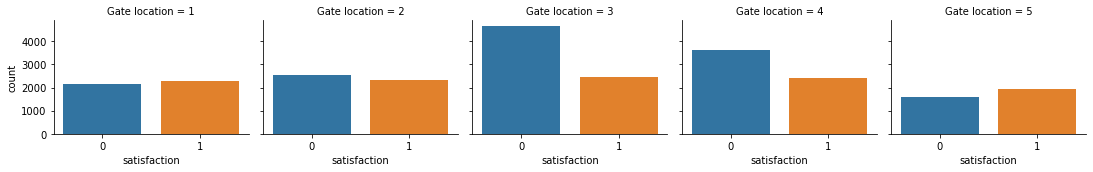

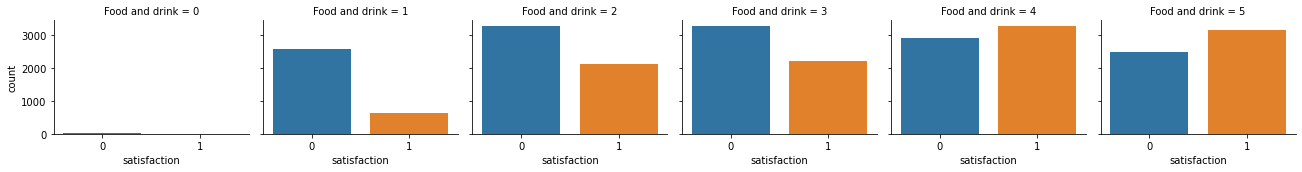

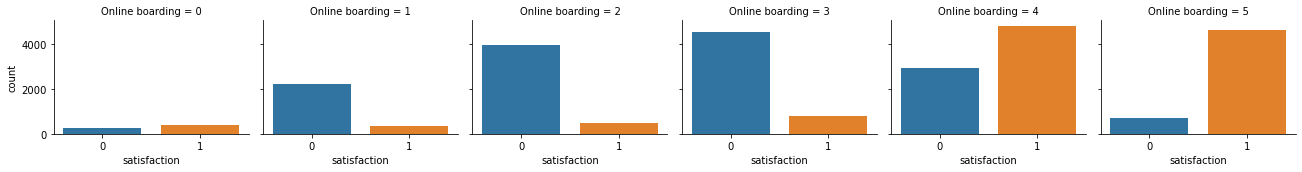

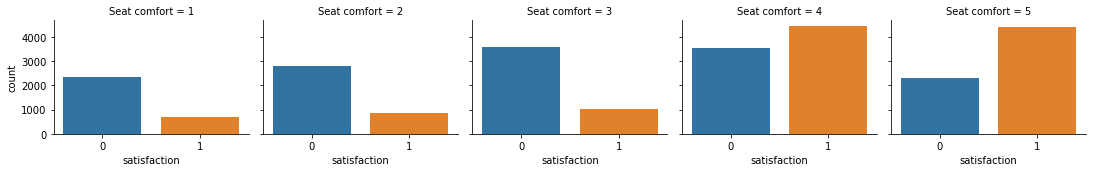

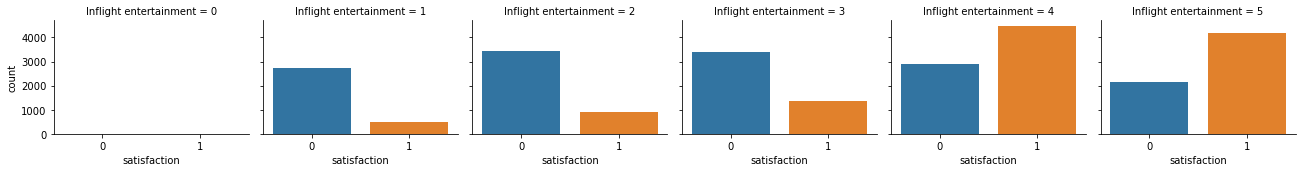

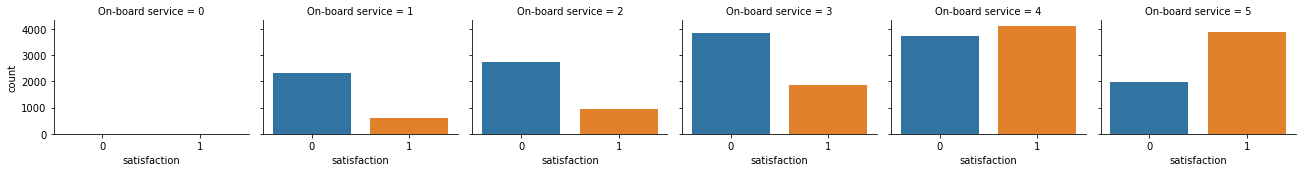

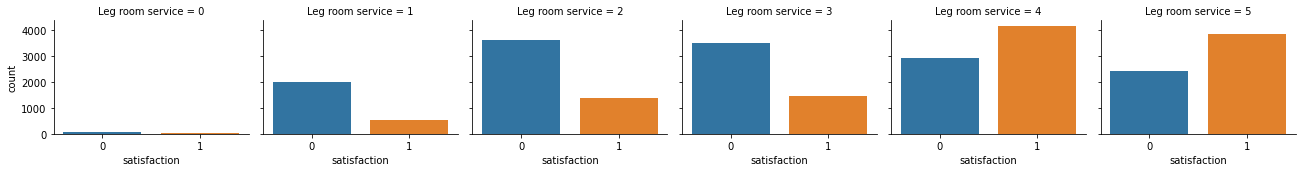

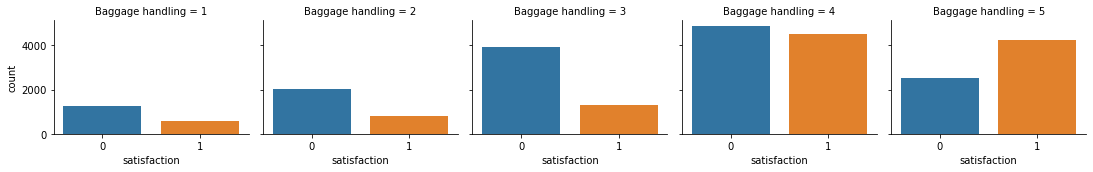

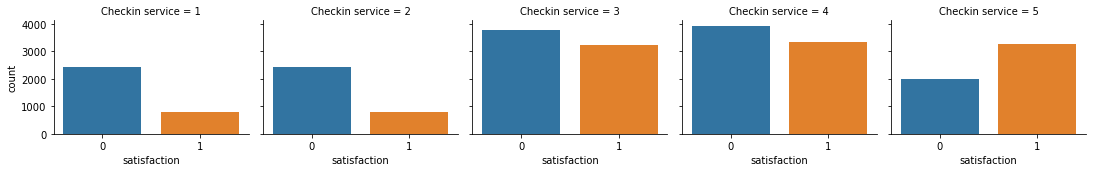

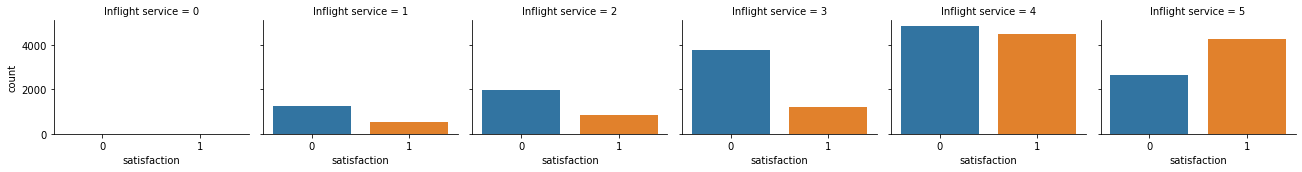

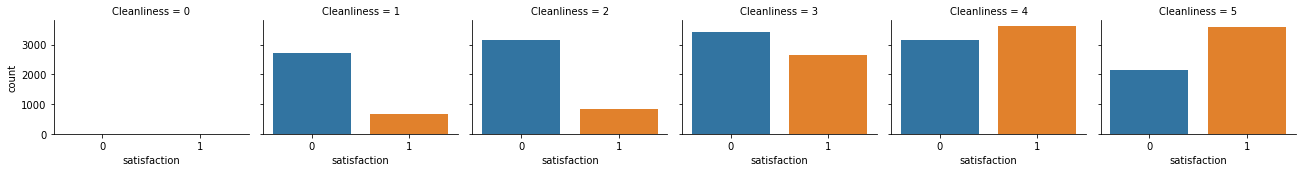

In [22]:
columns = ['Type of Travel', 'Class', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']
for column in columns:
    g = sns.catplot("satisfaction", col=column, col_wrap=6, data=df, kind="count", height=2.5, aspect=1.2)

#### As we can tell from the plots above: <br>
- **Type of Travel** - Almost all personal travelers were dissatisfied, while there were more satisfied buisness travelers than dissatisfied buisness travelers.
- **Class** - A lot of travelers were dissatisfied in Eco class, almost twice dissatisfied travelers in Buisness class were satisfied, dissatisfied travelers in Eco Plus were more than satisfied travelers.
- **Inflight wifi service** - A lot of the people who rated 1-3 the wifi service, were dissatisfied.
- **Departure/Arrival time convenient** - Dissatisfied were more than the satisfied (2-5)
- **Ease of Online booking** - Dissatisfied were more than the satisfied (1-3)
- **Gate location** - Dissatisfied travelers who voted 3 were almost twice satisfied travelers who voted 3, the rest were almost equal.
- **Food and drink** - Dissatisfied and satisfied were almost equal.
- **Online boarding** - Almost all the travelers who rated from 1 to 3 were dissatisfied.
- **Seat comfort** - From 1 to 3, there were a lot of dissatisfied travelers.
- **Inflight entertainment** - From 1 to 3, there were a lot of dissatisfied travelers.
- **On-board service** - From 1 to 3, there were a lot of dissatisfied travelers.
- **Leg room service** - From 1 to 3, there were a lot of dissatisfied travelers.
- **Baggage handling** - From 1 to 4, there were a lot of dissatisfied travelers.
- **Checkin service** - From 1 to 4, there were mre dissatisfied than satisfied.
- **Inflight service** - From 1 to 4, there were mre dissatisfied than satisfied.
- **Cleanliness** - From 1 to 3, there were mre dissatisfied than satisfied.

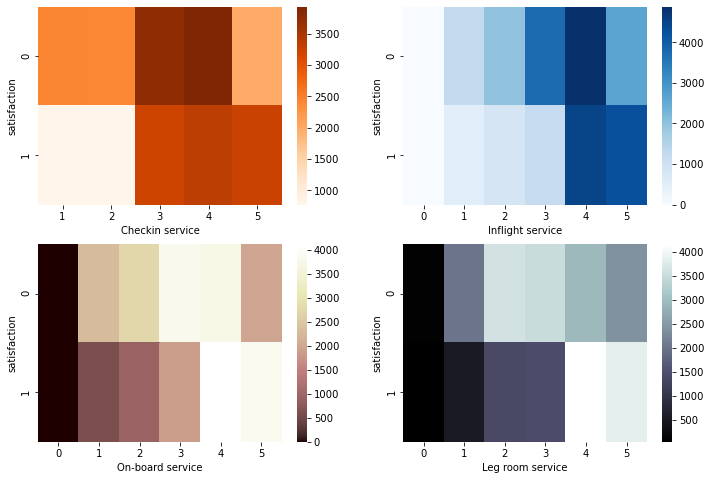

In [23]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

table1 = pd.crosstab(df['satisfaction'], df['Checkin service'])
sns.heatmap(table1, cmap='Oranges', ax = axarr[0][0])
table2 = pd.crosstab(df['satisfaction'], df['Inflight service'])
sns.heatmap(table2, cmap='Blues', ax = axarr[0][1])
table3 = pd.crosstab(df['satisfaction'], df['On-board service'])
sns.heatmap(table3, cmap='pink', ax = axarr[1][0])
table4 = pd.crosstab(df['satisfaction'], df['Leg room service'])
sns.heatmap(table4, cmap='bone', ax = axarr[1][1])

**Changing classes to numbers** - Eco Plus: 1 , Eco: 2 , Business: 3.

In [24]:
df["Class"] = df["Class"].str.replace('Eco Plus', '1')

In [25]:
df["Class"] = df["Class"].str.replace('Eco', '2')

In [26]:
df["Class"] = df["Class"].str.replace('Business', '3')

**Changing geder to numbers** - Female: 1 , Male: 0.

In [27]:
df["Gender"] = df["Gender"].str.replace('Female', '1')
df["Gender"] = df["Gender"].str.replace('Male', '0')

Changing "Class" and "Gender" type to int:

In [28]:
df["Class"] = df["Class"].astype(int)
df["Gender"] = df["Gender"].astype(int)

**Number of people who choose unique values in almost each column :** 

In [29]:
def bar_plot(variable):
    
    var=df[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values)
    
    plt.xlabel("Passengers Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var_Value))

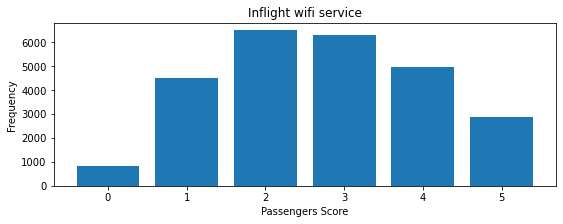

Inflight wifi service: 
 2    6490
3    6317
4    4981
1    4488
5    2887
0     813
Name: Inflight wifi service, dtype: int64


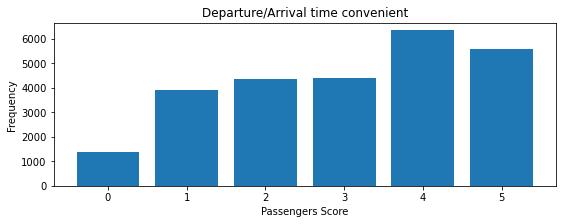

Departure/Arrival time convenient: 
 4    6334
5    5595
3    4412
2    4343
1    3911
0    1381
Name: Departure/Arrival time convenient, dtype: int64


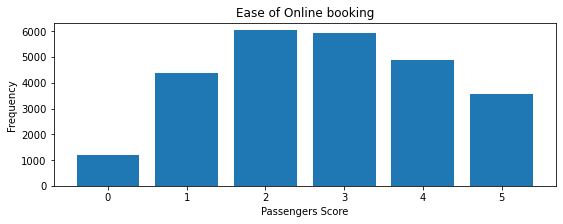

Ease of Online booking: 
 2    6030
3    5944
4    4873
1    4361
5    3573
0    1195
Name: Ease of Online booking, dtype: int64


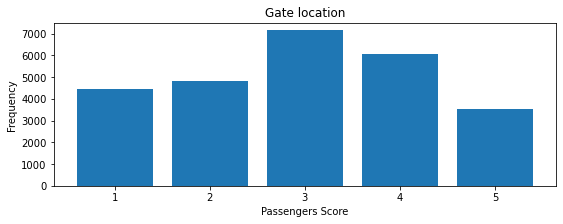

Gate location: 
 3    7140
4    6040
2    4837
1    4429
5    3530
Name: Gate location, dtype: int64


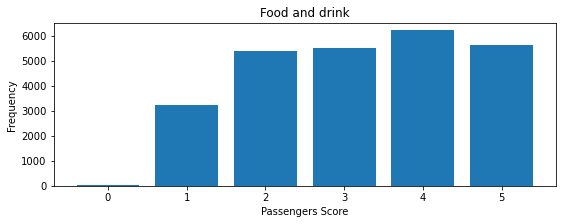

Food and drink: 
 4    6204
5    5644
3    5494
2    5395
1    3214
0      25
Name: Food and drink, dtype: int64


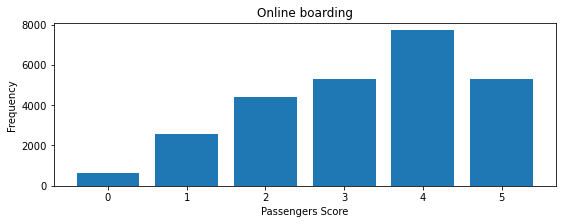

Online boarding: 
 4    7706
3    5313
5    5307
2    4429
1    2569
0     652
Name: Online boarding, dtype: int64


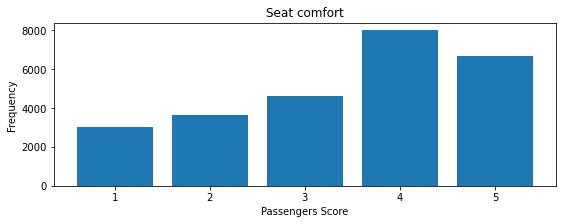

Seat comfort: 
 4    7991
5    6688
3    4632
2    3632
1    3033
Name: Seat comfort, dtype: int64


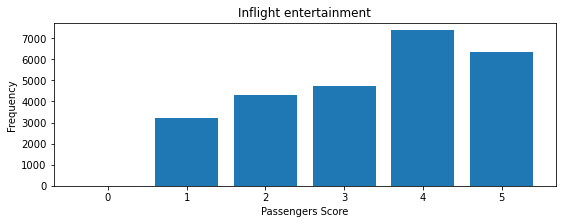

Inflight entertainment: 
 4    7368
5    6331
3    4745
2    4331
1    3197
0       4
Name: Inflight entertainment, dtype: int64


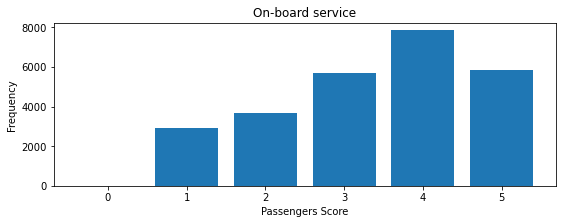

On-board service: 
 4    7836
5    5844
3    5709
2    3670
1    2915
0       2
Name: On-board service, dtype: int64


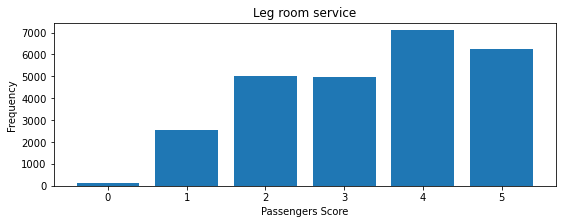

Leg room service: 
 4    7097
5    6238
2    5015
3    4958
1    2542
0     126
Name: Leg room service, dtype: int64


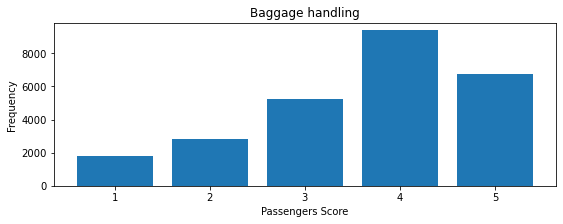

Baggage handling: 
 4    9378
5    6747
3    5219
2    2841
1    1791
Name: Baggage handling, dtype: int64


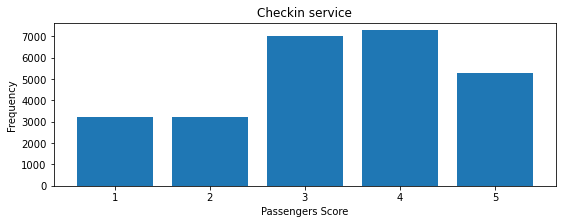

Checkin service: 
 4    7278
3    7007
5    5264
1    3218
2    3209
Name: Checkin service, dtype: int64


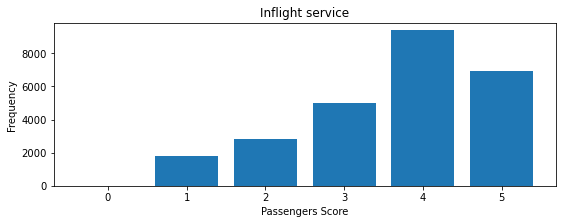

Inflight service: 
 4    9378
5    6950
3    5017
2    2851
1    1778
0       2
Name: Inflight service, dtype: int64


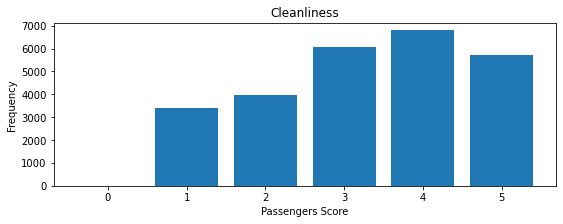

Cleanliness: 
 4    6790
3    6065
5    5727
2    3981
1    3411
0       2
Name: Cleanliness, dtype: int64


In [30]:
category1=["Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness",]
for c in category1:
    bar_plot(c)

### Let's train the set : 

In [31]:
train=df
X_train=train.drop(labels=["satisfaction","Type of Travel","Customer Type"],axis=1)
y_train=train["satisfaction"]
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.33,random_state=42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(df))

X_train 17403
X_test 8573
y_train 17403
y_test 8573
test 25976


In [258]:
random_state=42
classifier = [DecisionTreeClassifier(random_state=random_state),
             RandomForestClassifier(random_state=random_state),
             LogisticRegression(random_state=random_state,solver='lbfgs',max_iter=100000),
             KNeighborsClassifier()]
dt_param_grid={"min_samples_split":range(10,500,20),
              "max_depth":range(1,20,2)}
rf_param_grid={"max_features":[1,3,10],
              "min_samples_split":[2,3,10],
              "min_samples_leaf":[1,3,10],
              "bootstrap":[False],
              "n_estimators":[100,300],
              "criterion":["gini"]}

logreg_param_grid={"C":np.logspace(-3,3,7),
                  "penalty":["l1","l2"]}
knn_param_grid={"n_neighbors": np.linspace(1,19,10,dtype=int).tolist(),
               "weights":["uniform","distance"],
               "metric":["euclidean","manhattan"]}
classifier_param=[dt_param_grid,
                 rf_param_grid,
                 logreg_param_grid,
                 knn_param_grid]

In [197]:
cv_result=[]
best_estimators=[]
for i in range(len(classifier)):
    clf=GridSearchCV(classifier[i],param_grid=classifier_param[i],cv=StratifiedKFold(n_splits=10),scoring="accuracy",n_jobs=-1,verbose=1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 1496 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 2396 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2485 out of 2500 | elapsed:  1.4min remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:  1.4min finished


0.9264495566691094
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 22.0min finished


0.9468478942607961
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  2.0min finished


0.8443358289264328
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:   42.8s finished


0.7703272329946456


Text(0.5, 1.0, 'Cross Validation Scores')

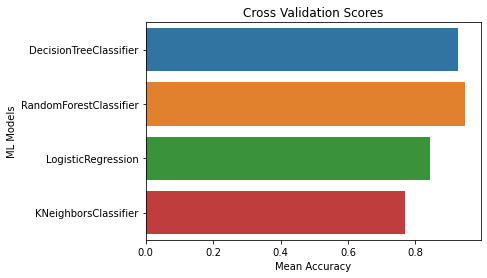

In [259]:
cv_results = pd.DataFrame({"Cross Validation Means":[0.9264495566691094,0.9468478942607961,0.8443358289264328,0.7703272329946456],
                           "ML Models":["DecisionTreeClassifier","RandomForestClassifier","LogisticRegression","KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

**As we can tell from the barlot above :**
<br>
**Random Forest classifier** has the best accuracy score: 0.94 <br>
**Decision Tree classifier** has the second best accuracy score: 0.92 <br>
**Logistic Regression** 3rd place, with accuracy score: 0.84 <br>
**KNeighbors classifier** accuracy score: 0.77 .

Combinig the best two classifiers, Random forest classifier and Decision tree classifier :

In [260]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[1])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

0.9296628951358917


### Choosing the best accuracy score model: <br>
**Random Forest classifier**

In [312]:
clf=GridSearchCV(classifier[1],param_grid=classifier_param[1],cv=StratifiedKFold(n_splits=10),scoring="accuracy",n_jobs=-1,verbose=1)
clf.fit(X_train,y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 22.1min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 33.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300]},
             scoring='accuracy', verbose=1)

Accuracy score: 0.9407441968972355
roc accuracy: 0.9382017798987556
              precision    recall  f1-score   support

           0    0.93990   0.95688   0.94831      4870
           1    0.94191   0.91952   0.93058      3703

    accuracy                        0.94074      8573
   macro avg    0.94090   0.93820   0.93945      8573
weighted avg    0.94076   0.94074   0.94065      8573



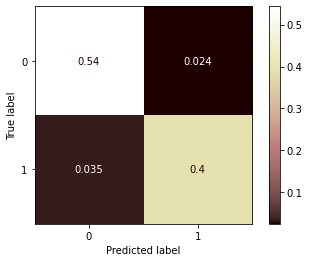

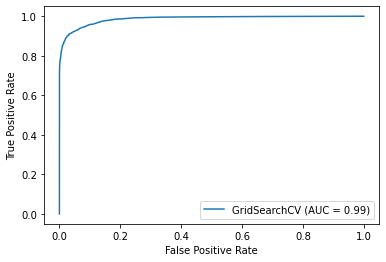

In [314]:
y_pred = clf.predict(X_test)
print("Accuracy score:",accuracy_score(y_test, y_pred))
print("roc accuracy:", roc_auc_score(y_test, y_pred))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
plot_roc_curve(clf, X_test, y_test)
    